In [2]:
from IPython.display import HTML


In [6]:
HTML("""
<video width="640" controls>
  <source src="Norme1.mp4" type="video/mp4">
</video>
""")

<IPython.core.display.Javascript object>


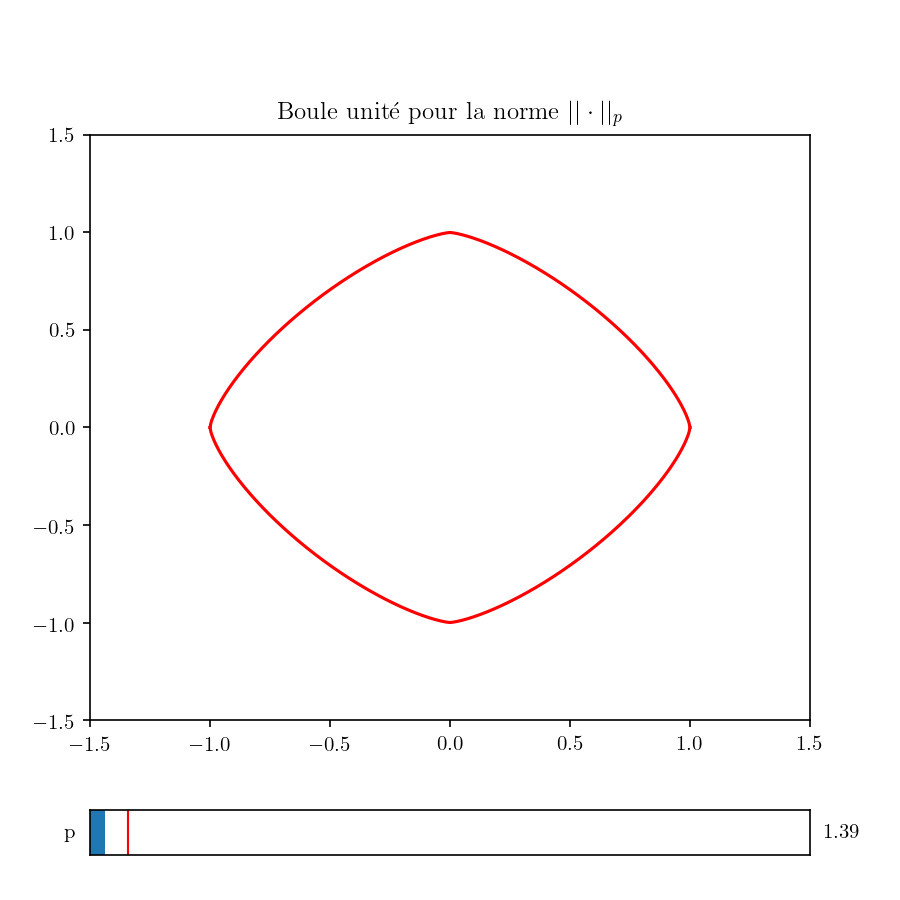

In [9]:
%matplotlib notebook
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

p_min = 1   # the minimial value of the parameter a
p_max = 20   # the maximal value of the parameter a
p_init = 2   # the value of the parameter a to be used initially, when the graph is created

x = np.linspace(-1, 1, 500)

fig = plt.figure(figsize=(6,6))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
figure_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(figure_ax) # select sin_ax

plt.title(r"Boule unité pour la norme $||\cdot||_p$")
pos_plot, = plt.plot(x, (1-abs(x)**p_init)**(1/p_init), 'r')
neg_plot, = plt.plot(x, -(1-abs(x)**p_init)**(1/p_init), 'r')
#plt.fill_between(x,-(1-abs(x)**p_init)**(1/p_init),(1-abs(x)**p_init)**(1/p_init))

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# here we create the slider
p_slider = Slider(slider_ax,      # the axes object containing the slider
                  'p',            # the name of the slider parameter
                  p_min,          # minimal value of the parameter
                  p_max,          # maximal value of the parameter
                  valinit=p_init  # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(p):
    pos_plot.set_ydata((1-abs(x)**p)**(1/p)) # set new y-coordinates of the plotted points
    neg_plot.set_ydata(-(1-abs(x)**p)**(1/p))
    #plt.fill_between(x,-(1-abs(x)**p)**(1/p),(1-abs(x)**p)**(1/p))

    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
p_slider.on_changed(update)

plt.show()

<IPython.core.display.Javascript object>


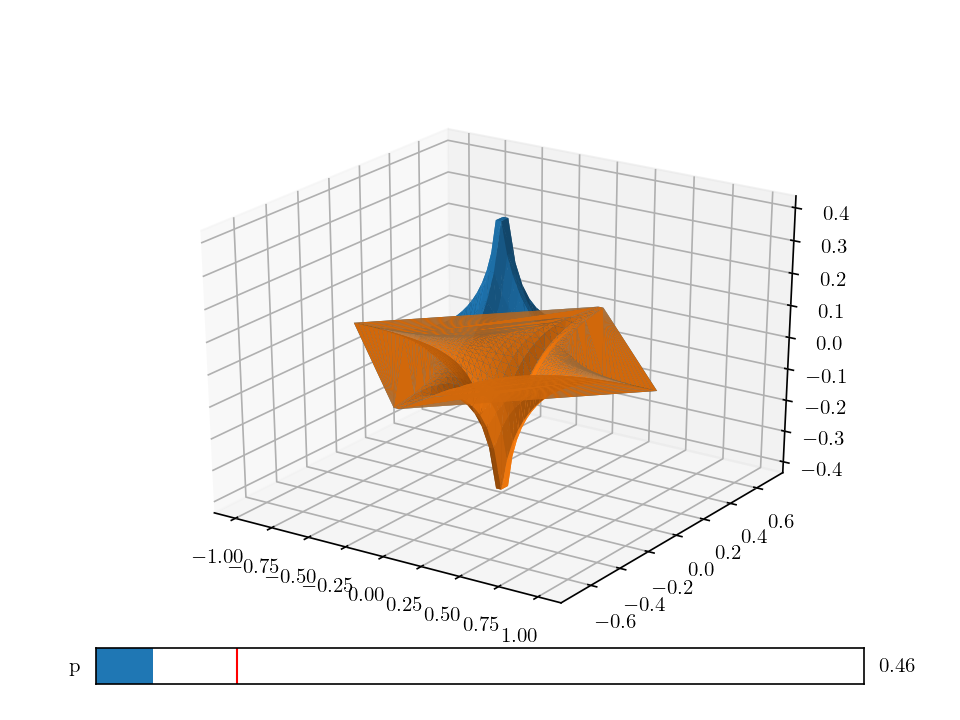

In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np


p_min = 0.1   # the minimial value of the parameter a
p_max = 5   # the maximal value of the parameter a
p_init = 1 


n=30
x=[]
y=[]

for i in np.linspace(-1,1,2*n):
    for j in np.linspace(-(1-np.abs(i)**p_init)**(1/p_init), (1-np.abs(i)**p_init)**(1/p_init),n):
        x=x+[i]
        y=y+[j]

    
x=np.array(x)
y=np.array(y)

z1=(np.abs(1-np.abs(x)**p_init-np.abs(y)**p_init))**(1/p_init)
z2=-z1

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z1, linewidth=0.2, antialiased=True)
ax.plot_trisurf(x, y, z2, linewidth=0.2, antialiased=True)

#neg_plot, = plt.plot(x, -(1-abs(x)**p_init)**(1/p_init), 'r')
#z_1=f(x,y)
#z_2= -z_1

slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])

p_slider = Slider(slider_ax,      # the axes object containing the slider
                  'p',            # the name of the slider parameter
                  p_min,          # minimal value of the parameter
                  p_max,          # maximal value of the parameter
                  valinit=p_init  # initial value of the parameter
                 )


def update(p):
    ax.clear()
    x=[]
    y=[]
    for i in np.linspace(-1,1,2*n):
        for j in np.linspace(-(1-np.abs(i)**p)**(1/p), (1-np.abs(i)**p)**(1/p),n):
            x=x+[i]
            y=y+[j]
    x=np.array(x)
    y=np.array(y)
    z1=(np.abs(1-np.abs(x)**p-np.abs(y)**p))**(1/p)
    z2=-z1
    ax.plot_trisurf(x, y, z1, linewidth=0.2, antialiased=True)
    ax.plot_trisurf(x, y, z2, linewidth=0.2, antialiased=True)
    fig.canvas.draw_idle() 

# the final step is to specify that the slider needs to
# execute the above function when its value changes
p_slider.on_changed(update)

#ax.plot_trisurf(x, y, z_1, linewidth=0.2, antialiased=True)
#ax.plot_trisurf(x, y, z_2, linewidth=0.2, antialiased=True)


plt.show()
